<a href="https://colab.research.google.com/github/MeghanGH/time-series-with-python/blob/main/Visualizing_time_series_data_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **To work with time series data in pandas,your date columns needs to be of the datetime64 type.**

# import

In [82]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
ch2_co2_levels_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch2_co2_levels.csv'
ch2_co2_levels = pd.read_csv(ch2_co2_levels_csv, parse_dates=['datestamp'], index_col='datestamp')
ch2_co2_levels.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


# Line Plots

In [84]:
import pandas as pd
ch2_co2_levels_df = pd.read_csv(ch2_co2_levels_csv)
print(ch2_co2_levels_df.head())

    datestamp    co2
0  1958-03-29  316.1
1  1958-04-05  317.3
2  1958-04-12  317.6
3  1958-04-19  317.5
4  1958-04-26  316.4


## Test whether your data is of the correct type

In [85]:
# Print the data type of each column in discoveries
print(ch2_co2_levels_df.dtypes)

# Convert the date column to a datestamp type
ch2_co2_levels_df['datestamp'] = pd.to_datetime(ch2_co2_levels_df['datestamp'])

# Print the data type of each column in discoveries, again
print(ch2_co2_levels_df.dtypes)

datestamp     object
co2          float64
dtype: object
datestamp    datetime64[ns]
co2                 float64
dtype: object


## Plot time series with plt.style

In [86]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [87]:
discoveries_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch1_discoveries.csv'
discoveries = pd.read_csv(discoveries_csv)
discoveries.head()

,date,Y
0,01-01-1860,5
1,01-01-1861,3
2,01-01-1862,0
3,01-01-1863,2
4,01-01-1864,0


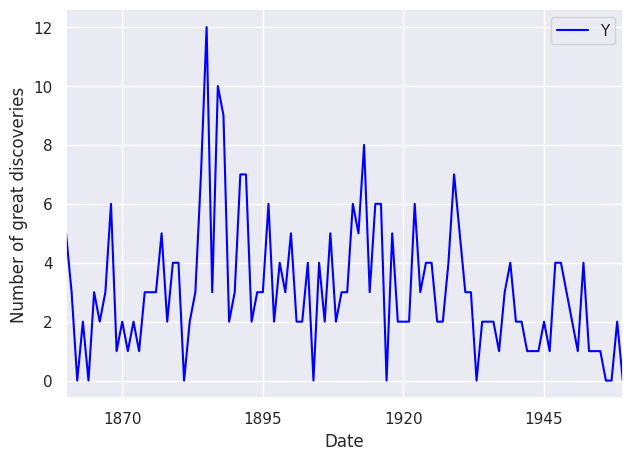

In [88]:
# Set the date column as the index of your DataFrame discoveries
discoveries['date'] = pd.to_datetime(discoveries['date'])
discoveries = discoveries.set_index('date')

# Plot the time series in your DataFrame
ax = discoveries.plot(color='blue')

# Specify the x-axis label in your plot
ax.set_xlabel('Date')

# Specify the y-axis label in your plot
ax.set_ylabel('Number of great discoveries')

# Show plot
plt.show()

## Specify plot styles

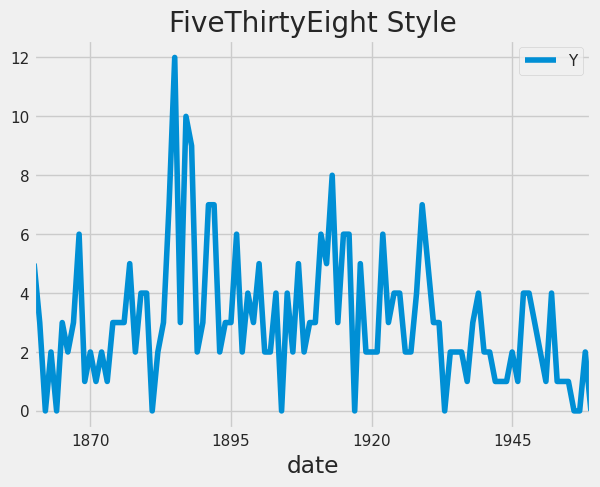

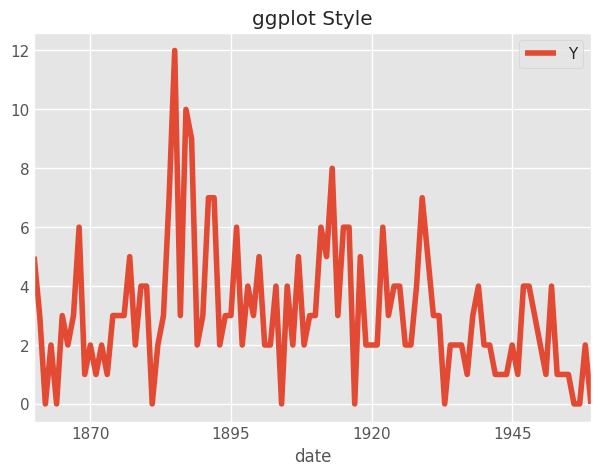

In [89]:
# Import the matplotlib.pyplot sub-module
import matplotlib.pyplot as plt

# Use the fivethirtyeight style
plt.style.use('fivethirtyeight')

# Plot the time series
ax1 = discoveries.plot()
ax1.set_title('FiveThirtyEight Style')
plt.show()

# Use the ggplot style
plt.style.use('ggplot')
ax2 = discoveries.plot()

# Set the title
ax2.set_title('ggplot Style')
plt.show()

## Display and label plots

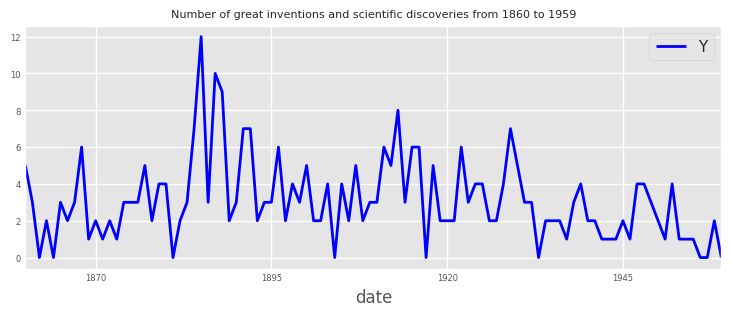

In [90]:
# Plot a line chart of the discoveries DataFrame using the specified arguments
ax = discoveries.plot(color='blue', figsize=(8, 3), linewidth=2, fontsize=6)

# Specify the title in your plot
ax.set_title('Number of great inventions and scientific discoveries from 1860 to 1959', fontsize=8)

# Show plot
plt.show()

## Subset time series data

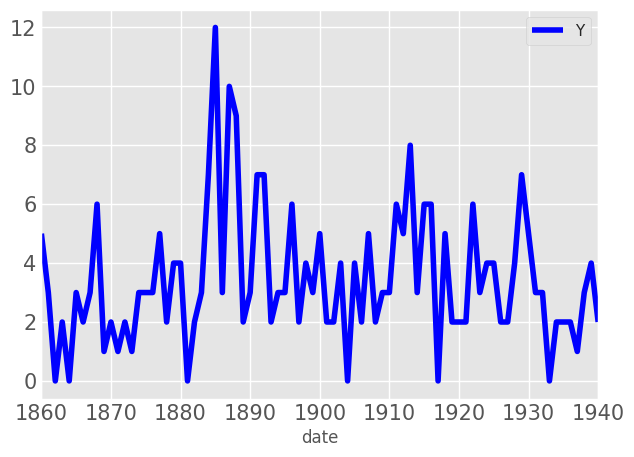

In [91]:
# Select the subset of data between 1939 and 1958
discoveries_subset_2 = discoveries['1860':'1940']

# Plot the time series in your DataFrame as a blue area chart
ax = discoveries_subset_2.plot(color='blue', fontsize=15)

# Show plot
plt.show()

## Add vertical and horizontal markers

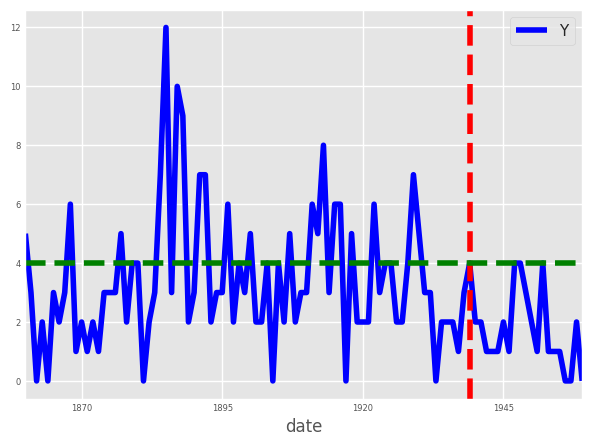

In [92]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a red vertical line
ax.axvline('1939-01-01', color='red', linestyle='--')

# Add a green horizontal line
ax.axhline(y=4, color='green', linestyle='--')

plt.show()

## Add shaded regions to your plot

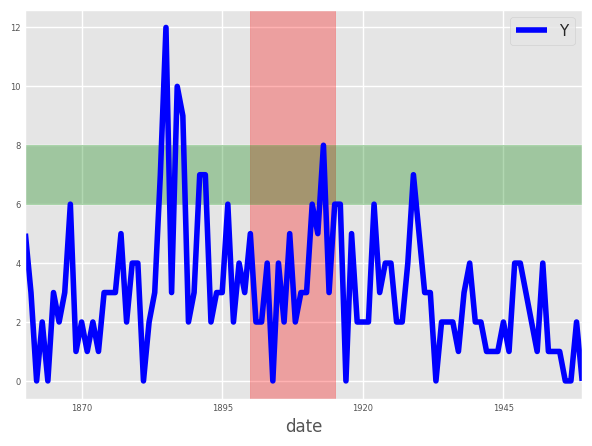

In [93]:
# Plot your the discoveries time series
ax = discoveries.plot(color='blue', fontsize=6)

# Add a vertical red shaded region
ax.axvspan('1900-01-01', '1915-01-01', color='red', alpha=0.3)

# Add a horizontal green shaded region
ax.axhspan(6, 8, color='green', alpha=0.3)

plt.show()

# Summary Statistics and Diagnostics

## Clean your time series data

In [94]:
co2_levels = ch2_co2_levels

# Set datestamp column as index
# co2_levels = co2_levels.set_index('date')

# Print out the number of missing values
print(co2_levels.isnull().sum())

co2    59
dtype: int64


In [95]:
# Impute missing values with the next valid observation
co2_levels = co2_levels.fillna(method='bfill')

#bfill (i.e backfilling) will ensure that missing values are replaced using the next valid observation,
# while ffill (i.e. forward-filling) ensures that missing values are replaced using the last valid observation.

# Print out the number of missing values
print(co2_levels.isna().sum())
print(co2_levels.isnull().sum())

co2    0
dtype: int64
co2    0
dtype: int64


## Display rolling averages
The window parameter should be set according to the granularity of your time series. For example, if your time series contains daily data and you are looking for rolling values over a whole year, you should specify the parameter to window=365.

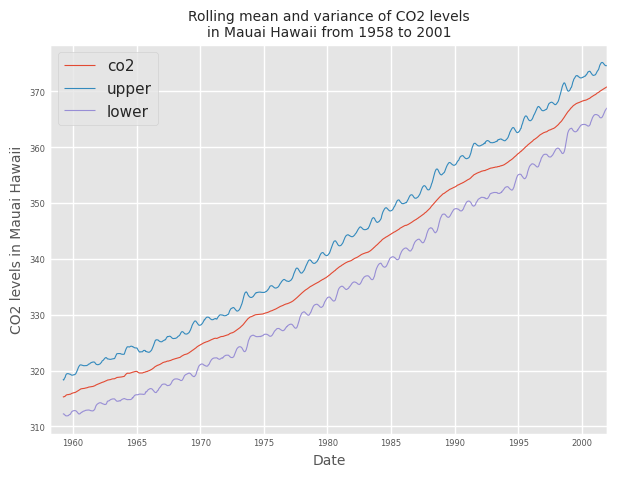

In [96]:
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

## Display aggregated values

In [97]:
print(co2_levels.head())
print(co2_levels.index.month)

              co2
datestamp        
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4
Int64Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
            ...
            10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
           dtype='int64', name='datestamp', length=2284)


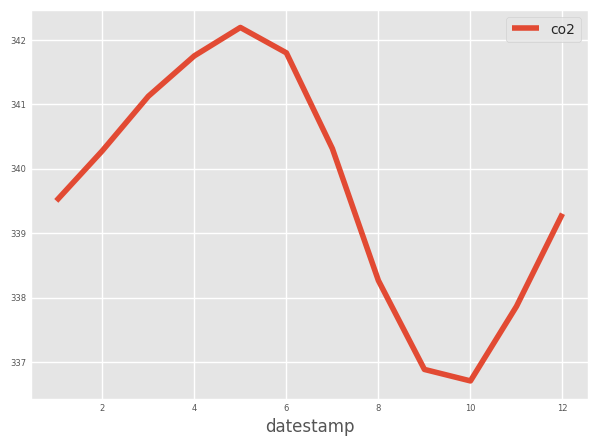

In [98]:
# Get month for each dates in the index of co2_levels
index_month = co2_levels.index.month

# Compute the mean CO2 levels for each month of the year
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

# Plot the mean CO2 levels for each month of the year
mean_co2_levels_by_month.plot(fontsize=6)

# Specify the fontsize on the legend
plt.legend(fontsize=10)

# Show plot
plt.show()

## Summarize the values in your time series data

In [99]:
# Print out summary statistics of the co2_levels DataFrame
print(co2_levels.describe())

# Print out the minima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.min())

# Print out the maxima of the co2 column in the co2_levels DataFrame
print(co2_levels.co2.max())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000
313.0
373.9


## Boxplots

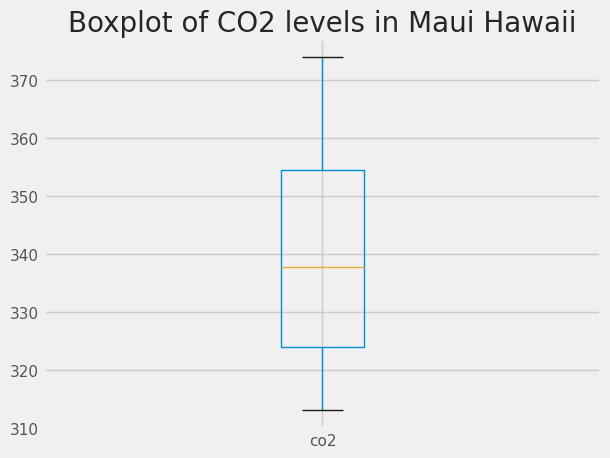

In [114]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of CO2 levels in Maui Hawaii', fontsize=20)
plt.show()


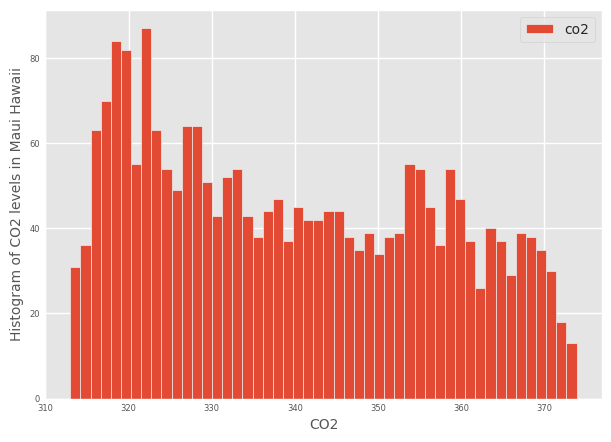

In [101]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## Histograms

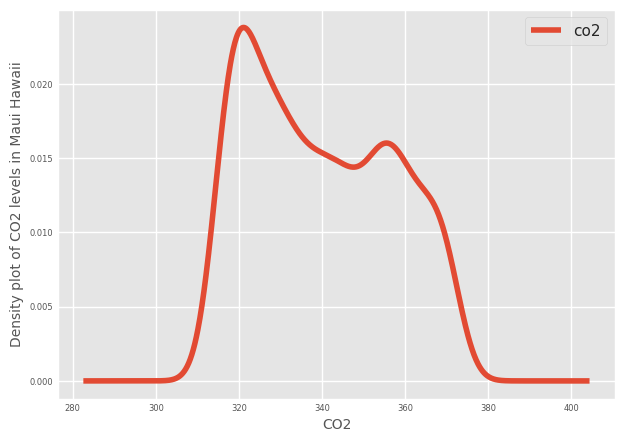

In [102]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()

# Seasonality, Trend and Noise

## Autocorrelation in time series data

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.

In [103]:
co2_levels['co2']

datestamp
1958-03-29    316.1
1958-04-05    317.3
1958-04-12    317.6
1958-04-19    317.5
1958-04-26    316.4
              ...  
2001-12-01    370.3
2001-12-08    370.8
2001-12-15    371.2
2001-12-22    371.3
2001-12-29    371.5
Name: co2, Length: 2284, dtype: float64

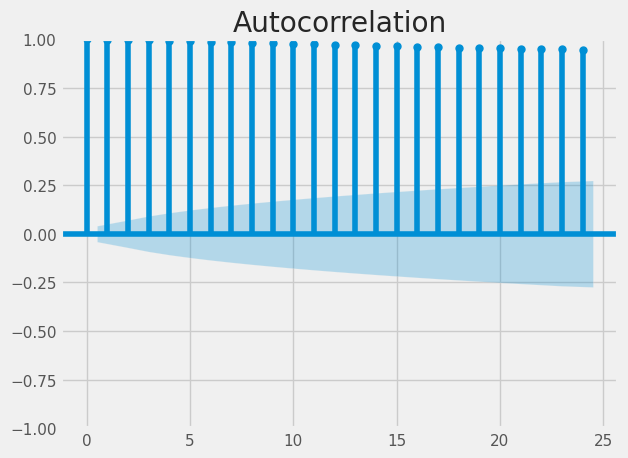

In [104]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

## Interpret autocorrelation plots

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

## Partial autocorrelation in time series data

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, …) and its own values lagged by 3 time points (t_4, t_5, t_6, …), but only after removing all effects attributable to lags 1 and 2.

The plot_pacf() function in the statsmodels library can be used to measure and plot the partial autocorrelation of a time series.

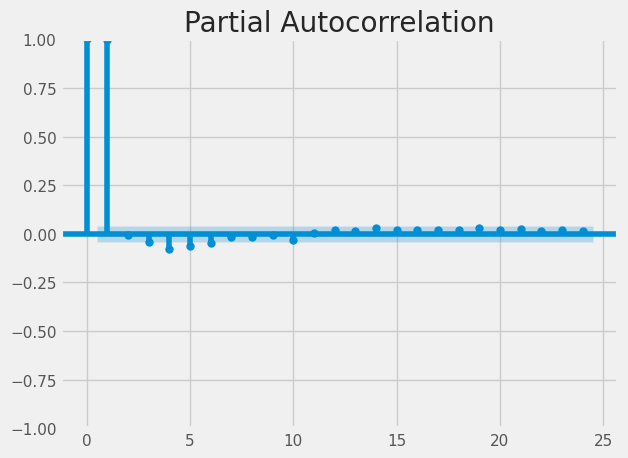

In [105]:
# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

## Interpret partial autocorrelation plots

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In the partial autocorrelation plot below, at which lag values do we have statistically significant partial autocorrelations?


0, 1, 4, 5 and 6

## **Time series decomposition**

When visualizing time series data, you should look out for some distinguishable patterns:

* **seasonality**: does the data display a clear periodic pattern?
* **trend**: does the data follow a consistent upwards or downward slope?
* **noise**: are there any outlier points or missing values that are not consistent with the rest of the data?

You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.

decomposition = sm.tsa.seasonal_decompose(time_series)
You can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.

In [106]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


## **Plot individual components**

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, resid) components.

* observed = decomposition.observed
* trend = decomposition.trend
* residuals = decomposition.resid

You can then use the extracted components and plot them individually.

The decomposition object you created in the last exercise is available in your workspace.

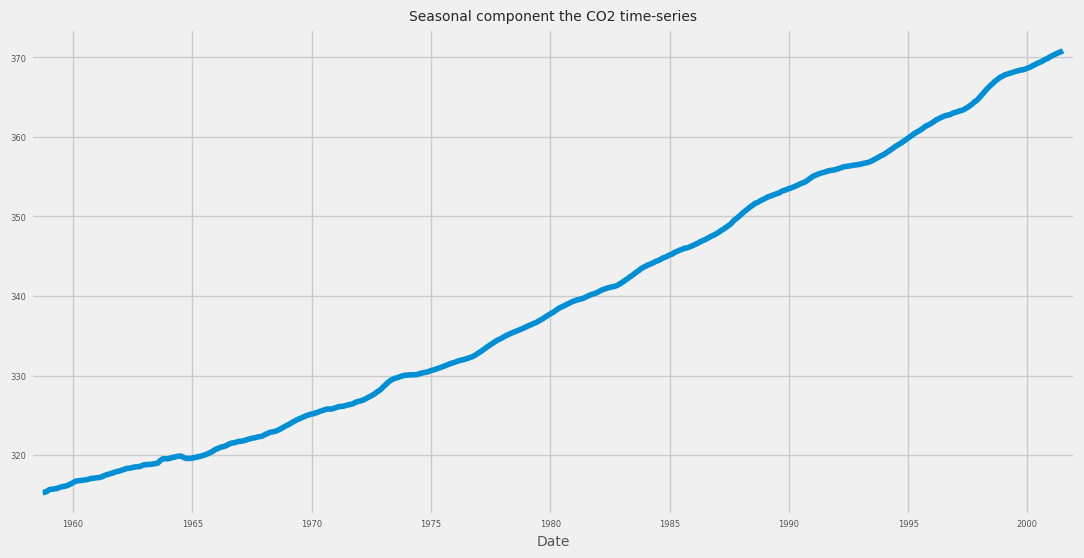

In [107]:
# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

## Visualize the airline dataset

In [110]:
ch3_airline_passengers_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch3_airline_passengers.csv'
airline = pd.read_csv(ch3_airline_passengers_csv, parse_dates=['Month'], index_col='Month')
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


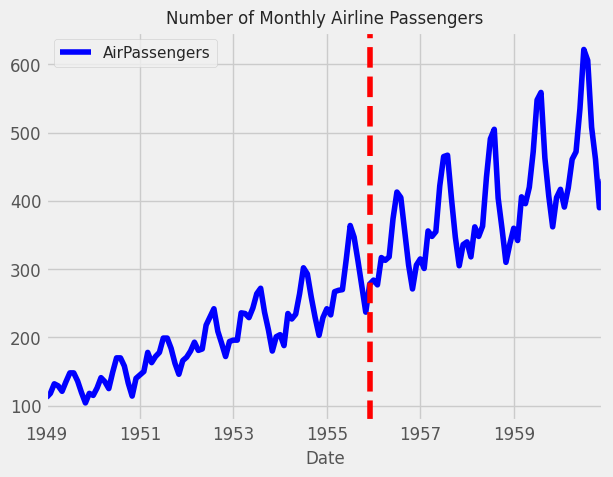

In [111]:
# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

## Analyze the airline dataset

In [112]:
# Print out the number of missing values
print(airline.isna().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


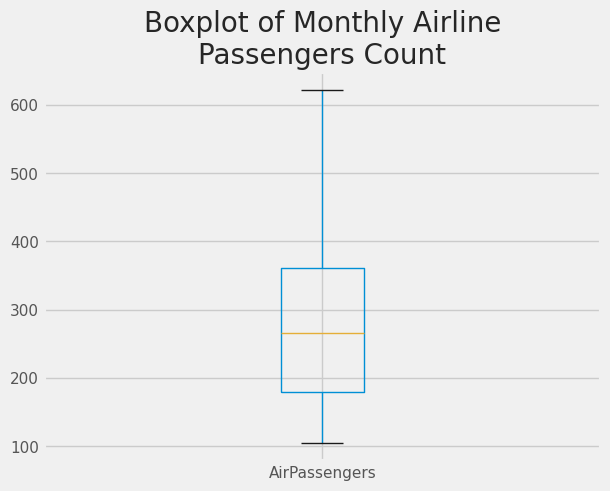

In [113]:
# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

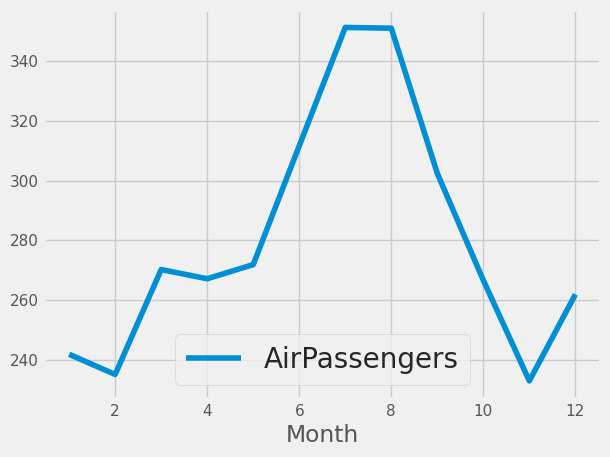

In [115]:
# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

## Time series decomposition of the airline dataset

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
            trend   seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


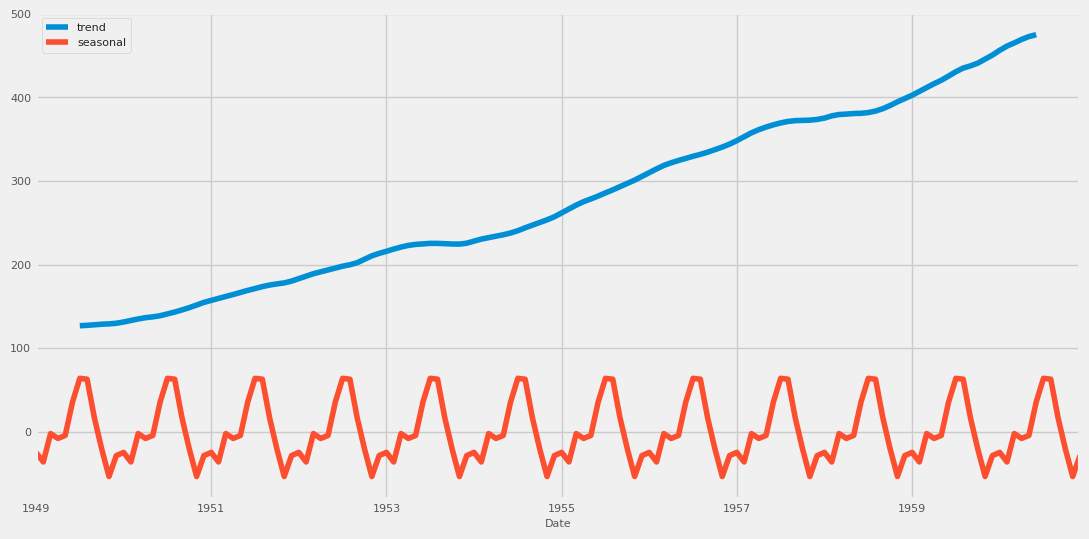

In [125]:
# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal
print(trend)

# series to dataframe
airline_decomposed = pd.concat([trend, seasonal], axis=1)


# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=8)

# Specify axis labels
ax.set_xlabel('Date', fontsize=8)
plt.legend(fontsize=8)
plt.show()

# Work with Multiple Time Series

## Load multiple time series

In [127]:
ch4_meat_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch4_meat.csv'
meat = pd.read_csv(ch4_meat_csv, parse_dates=['date'], index_col='date')
meat.head()

,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
date,,,,,,,
1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [130]:
# Convert the date column to a datestamp type
# meat['date'] = pd.to_datetime(meat['date'])

# Set the date column as the index of your DataFrame meat
# meat = meat.set_index('date')

# Print the summary statistics of the DataFrame
print(meat.describe())

              beef        veal         pork  lamb_and_mutton     broilers  \
count   827.000000  827.000000   827.000000       827.000000   635.000000   
mean   1683.463362   54.198549  1211.683797        38.360701  1516.582520   
std     501.698480   39.062804   371.311802        19.624340   963.012101   
min     366.000000    8.800000   124.000000        10.900000   250.900000   
25%    1231.500000   24.000000   934.500000        23.000000   636.350000   
50%    1853.000000   40.000000  1156.000000        31.000000  1211.300000   
75%    2070.000000   79.000000  1466.000000        55.000000  2426.650000   
max    2512.000000  215.000000  2210.400000       109.000000  3383.800000   

       other_chicken      turkey  
count     143.000000  635.000000  
mean       43.033566  292.814646  
std         3.867141  162.482638  
min        32.300000   12.400000  
25%        40.200000  154.150000  
50%        43.400000  278.300000  
75%        45.650000  449.150000  
max        51.100000  585.

## Visualize multiple time series

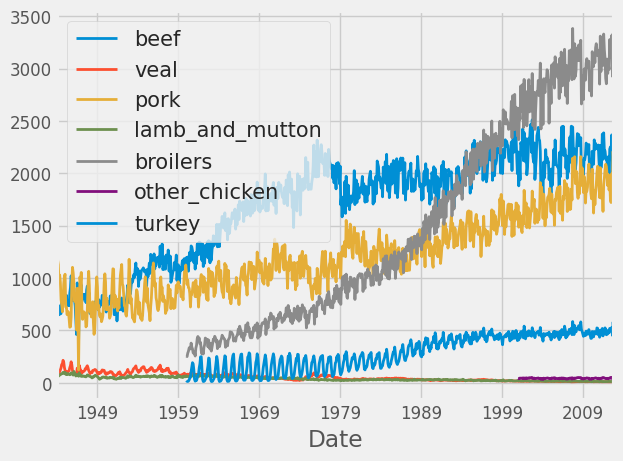

In [131]:
# Plot time series dataset
ax = meat.plot(linewidth=2, fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

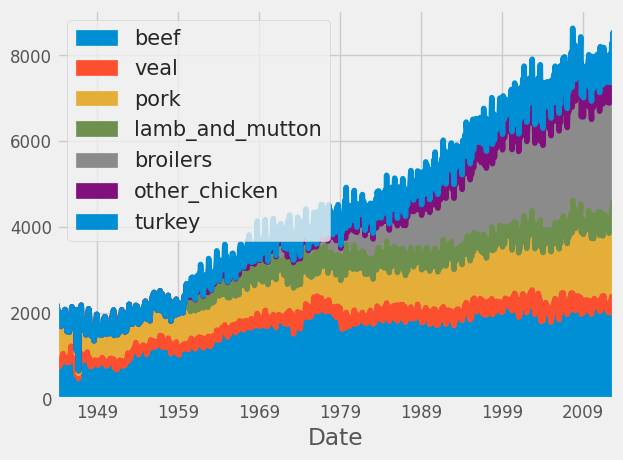

In [132]:
# Plot an area chart
ax = meat.plot.area(fontsize=12)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=15)

# Show plot
plt.show()

## Define the color palette of your plots

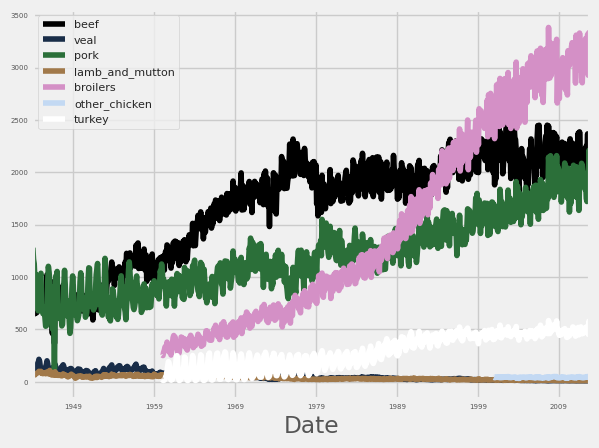

In [136]:
# Plot time series dataset using cubehelix colormap argument to .plot()
ax = meat.plot(colormap='cubehelix', fontsize=5)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=8)

# Show plot
plt.show()

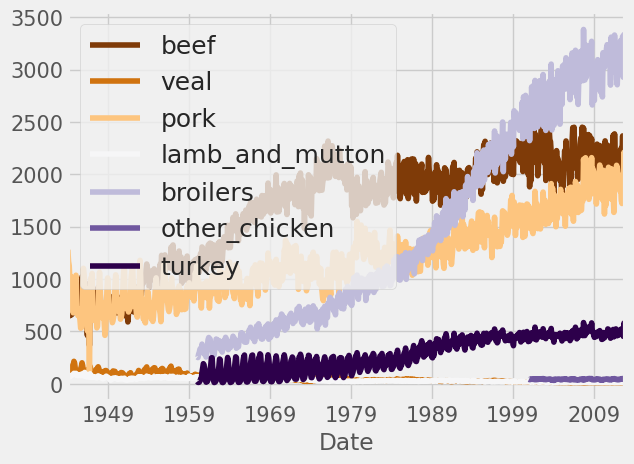

In [137]:
# Plot time series dataset using the PuOr color palette
ax = meat.plot(colormap='PuOr', fontsize=15)

# Additional customizations
ax.set_xlabel('Date')
ax.legend(fontsize=18)

# Show plot
plt.show()

## Add summary statistics to your time series plot



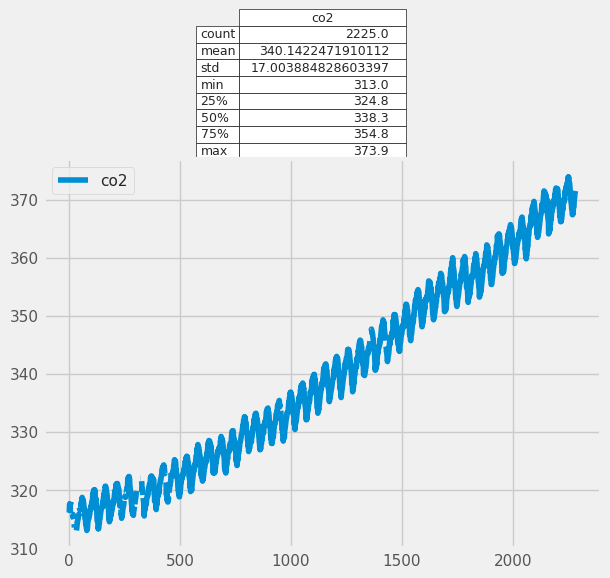

In [139]:
# Plot the time series data in the DataFrame
ax = df.plot()

# Compute summary statistics of the df DataFrame
df_summary = df.describe()

# Add summary table information to the plot
ax.table(cellText=df_summary.values,
         colWidths=[0.3]*len(df.columns),
         rowLabels=df_summary.index,
         colLabels=df_summary.columns,
         loc='top')

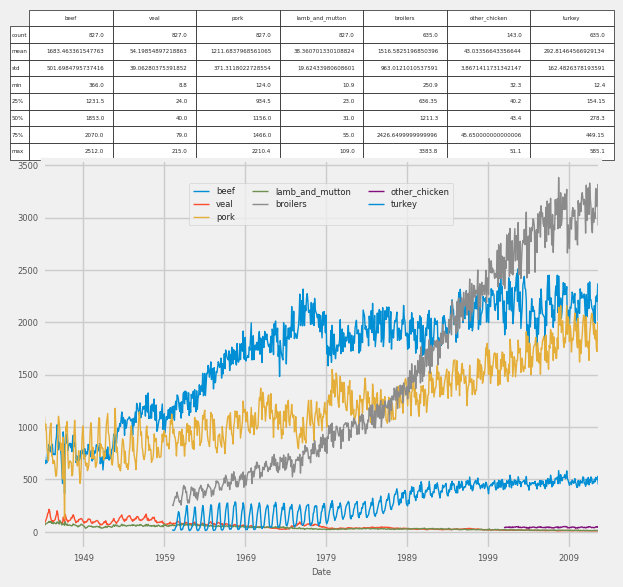

In [142]:
# Plot the meat data
ax = meat.plot(fontsize=6, linewidth=1)

# Add x-axis labels
ax.set_xlabel('Date', fontsize=6)

meat_mean = meat.describe()

# Add summary table information to the plot
ax.table(cellText=meat_mean.values,
         colWidths = [0.15]*len(meat_mean.columns),
         rowLabels=meat_mean.index,
         colLabels=meat_mean.columns,
         loc='top')

# Specify the fontsize and location of your legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=6)

# Show plot
plt.show()

## Plot your time series on individual plots

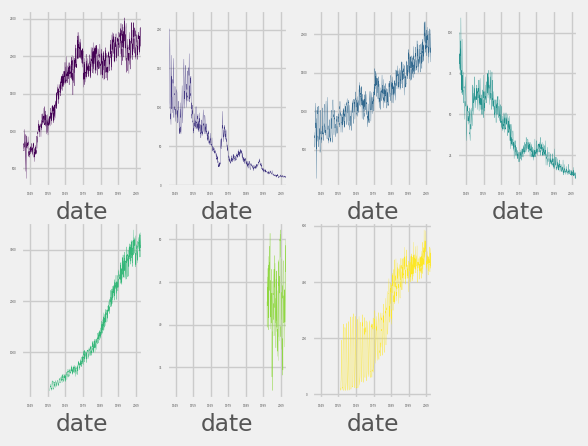

In [146]:
# Create a facetted graph with 2 rows and 4 columns
meat.plot(subplots=True,
          layout=(2,4),
          sharex=False,
          sharey=False,
          colormap='viridis',
          fontsize=2,
          legend=False,
          linewidth=0.2)

plt.show()

# Find relationships between multiple time series

In [150]:
# Print the correlation matrix between the beef and pork columns using the spearman method
print(meat[['beef', 'pork']].corr(method='spearman'))

# Print the correlation between beef and pork columns
print(0.828)

          beef      pork
beef  1.000000  0.827587
pork  0.827587  1.000000
0.828


In [149]:
# Compute the correlation between the pork, veal and turkey columns using the pearson method
print(meat[['pork', 'veal', 'turkey']].corr(method='pearson'))

# Print the correlation between veal and pork columns
print(-0.809)

# Print the correlation between veal and turkey columns
print(-0.768)

# Print the correlation between pork and turkey columns
print(0.835)

            pork      veal    turkey
pork    1.000000 -0.808834  0.835215
veal   -0.808834  1.000000 -0.768366
turkey  0.835215 -0.768366  1.000000
-0.809
-0.768
0.835


## Visualize correlation matrices

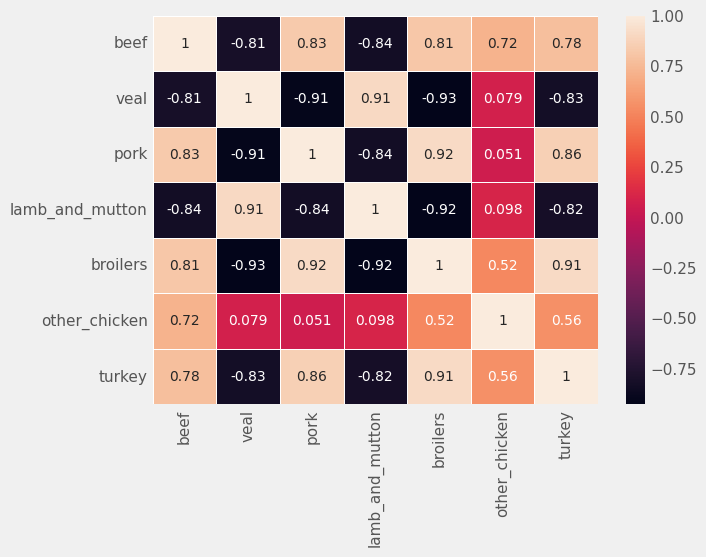

In [151]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame: corr_meat
corr_meat = meat.corr(method='spearman')

# Customize the heatmap of the corr_meat correlation matrix
sns.heatmap(corr_meat,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

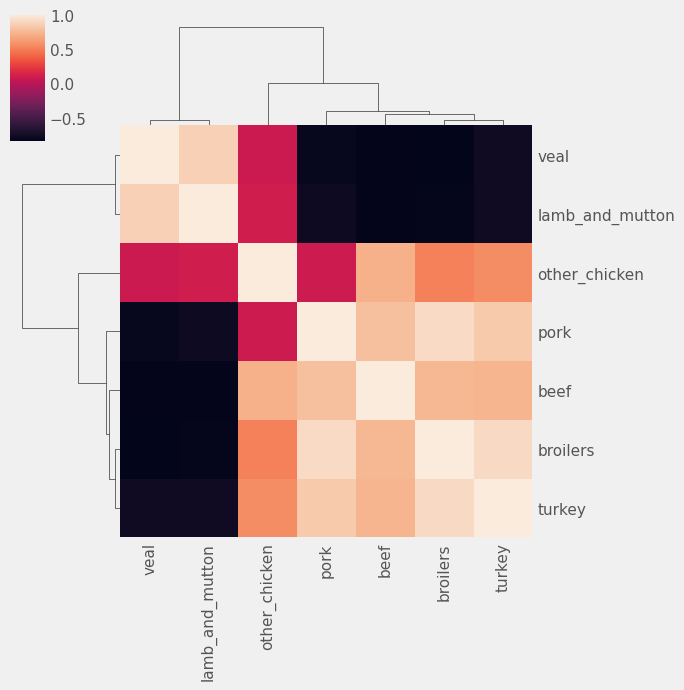

In [153]:
# Import seaborn library
import seaborn as sns

# Get correlation matrix of the meat DataFrame
corr_meat = meat.corr()

# Customize the heatmap of the corr_meat correlation matrix and rotate the x-axis labels
fig = sns.clustermap(corr_meat,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(7, 7))

plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

# Case Study: Unemployment Rate

In [155]:
ch5_employment_csv = '/content/drive/My Drive/Colab Notebooks/Time-Series-with-Python/data/ch5_employment.csv'
employment = pd.read_csv(ch5_employment_csv, parse_dates=['date'], index_col='date')
employment = pd.read_csv(ch5_employment_csv)
employment.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


## Explore the Jobs dataset

In [156]:
# Read in jobs file
jobs = pd.read_csv(ch5_employment_csv)

# Print first five lines of your DataFrame
print(jobs.head(5))

# Check the type of each column in your DataFrame
print(jobs.dtypes)

# Convert datestamp column to a datetime object
jobs['datestamp'] = pd.to_datetime(jobs['datestamp'])

# Set the datestamp columns as the index of your DataFrame
jobs = jobs.set_index('datestamp')

# Check the number of missing values in each column
print(jobs.isnull().sum())

    datestamp  Agriculture  Business services  Construction  \
0  2000-01-01         10.3                5.7           9.7   
1  2000-02-01         11.5                5.2          10.6   
2  2000-03-01         10.4                5.4           8.7   
3  2000-04-01          8.9                4.5           5.8   
4  2000-05-01          5.1                4.7           5.0   

   Durable goods manufacturing  Education and Health  Finance  Government  \
0                          3.2                   2.3      2.7         2.1   
1                          2.9                   2.2      2.8         2.0   
2                          2.8                   2.5      2.6         1.5   
3                          3.4                   2.1      2.3         1.3   
4                          3.4                   2.7      2.2         1.9   

   Information  Leisure and hospitality  Manufacturing  Mining and Extraction  \
0          3.4                      7.5            3.6                    3.9

## Describe time series data with boxplots

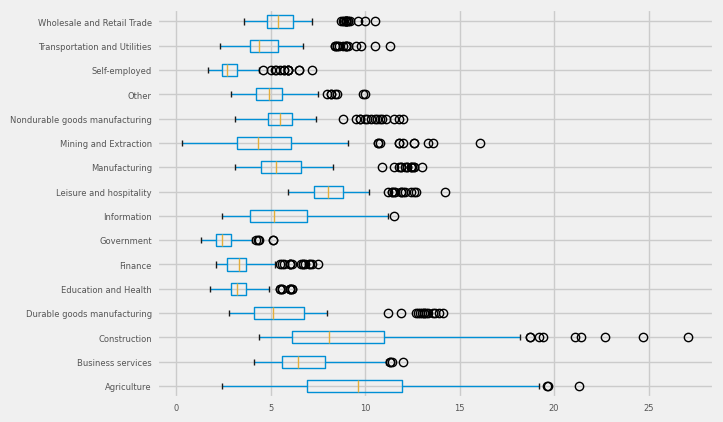

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


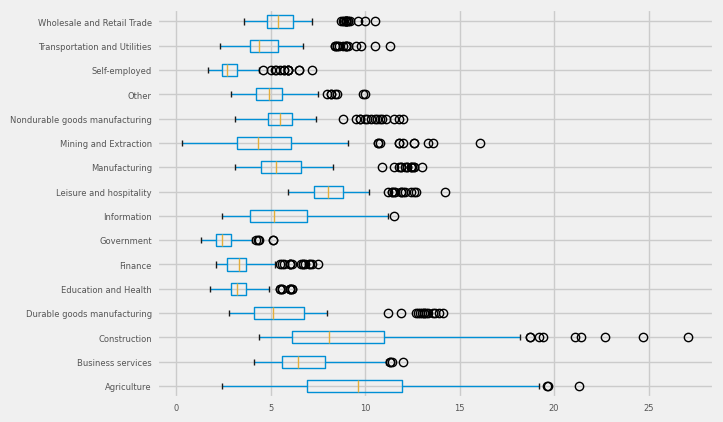

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


In [158]:
# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Generate a boxplot
jobs.boxplot(fontsize=6, vert=False)
plt.show()

# Generate numerical summaries
print(jobs.describe())

# Print the name of the time series with the highest mean
print('Agriculture')

# Print the name of the time series with the highest variability
print('Construction')

## Plot all the time series in your dataset

            Finance  Information  Manufacturing  Construction
datestamp                                                    
2000-01-01      2.7          3.4            3.6           9.7
2000-02-01      2.8          2.9            3.4          10.6
2000-03-01      2.6          3.6            3.6           8.7
2000-04-01      2.3          2.4            3.7           5.8
2000-05-01      2.2          3.5            3.4           5.0


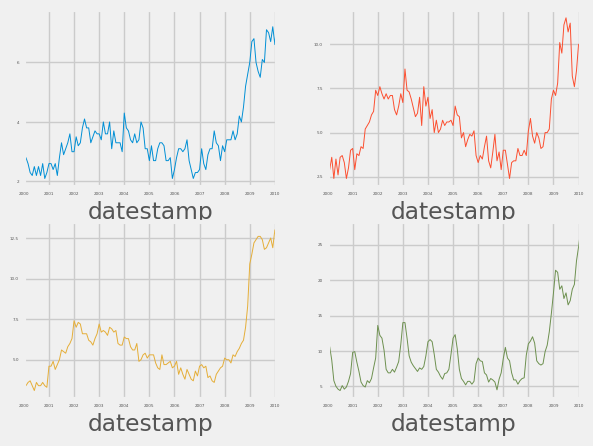

In [159]:
# A subset of the jobs DataFrame
jobs_subset = jobs[['Finance', 'Information', 'Manufacturing', 'Construction']]

# Print the first 5 rows of jobs_subset
print(jobs_subset.head())

# Create a facetted graph with 2 rows and 2 columns
ax = jobs_subset.plot(subplots=True,
                      layout=(2,2),
                      sharex=False,
                      sharey=False,
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

## Annotate significant events in time series data

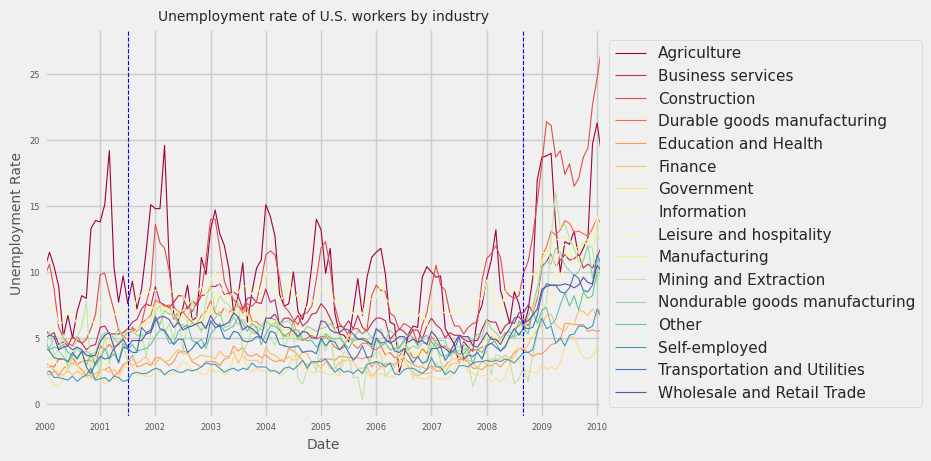

In [160]:
# Plot all time series in the jobs DataFrame
ax = jobs.plot(colormap='Spectral', fontsize=6, linewidth=0.8)

# Set labels and legend
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('Unemployment Rate', fontsize=10)
ax.set_title('Unemployment rate of U.S. workers by industry', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Annotate your plots with vertical lines
ax.axvline('2001-07-01', color='blue', linestyle='--', linewidth=0.8)
ax.axvline('2008-09-01', color='blue', linestyle='--', linewidth=0.8)

# Show plot
plt.show()

## Plot monthly trends

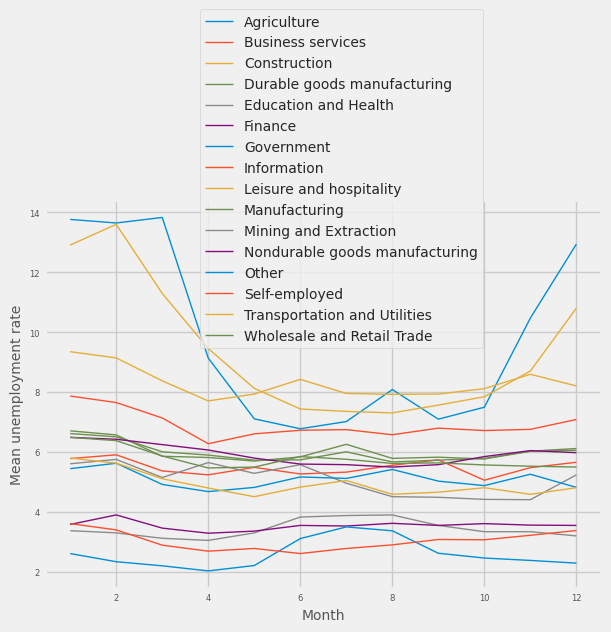

In [161]:
# Extract the month from the index of jobs
index_month = jobs.index.month

# Compute the mean unemployment rate for each month
jobs_by_month = jobs.groupby(index_month).mean()

# Plot the mean unemployment rate for each month
ax = jobs_by_month.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Month', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.8, 0.6), fontsize=10)
plt.show()

## Plot yearly trends

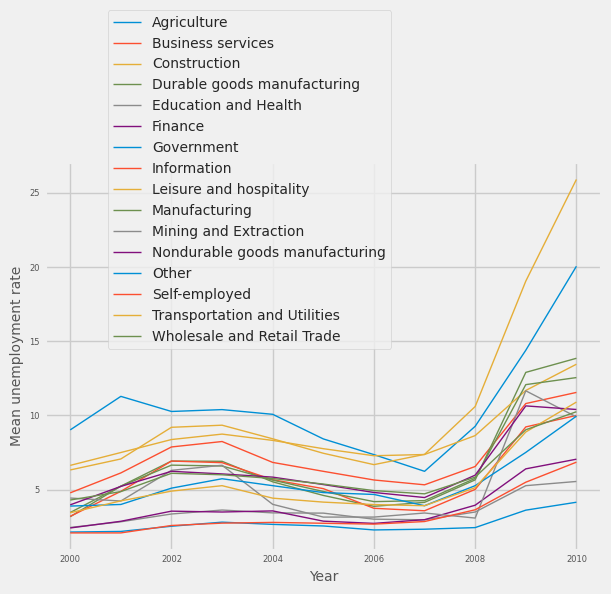

In [162]:
# Extract of the year in each date indices of the jobs DataFrame
index_year = jobs.index.year

# Compute the mean unemployment rate for each year
jobs_by_year = jobs.groupby(index_year).mean()

# Plot the mean unemployment rate for each year
ax = jobs_by_year.plot(fontsize=6, linewidth=1)

# Set axis labels and legend
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Mean unemployment rate', fontsize=10)
ax.legend(bbox_to_anchor=(0.1, 0.5), fontsize=10)
plt.show()

## Decomposing multiple time series with Python dictionaries

In [189]:
# Initialize dictionary
jobs_decomp = {}
idx = [0]

# Get the names of each time series in the DataFrame
jobs_names = jobs.columns
print(jobs_names)

# Run time series decomposition on each time series of the DataFrame
for ts in jobs_names:
    ts_decomposition = sm.tsa.seasonal_decompose(jobs[ts])
    jobs_decomp[ts] = ts_decomposition


print(jobs_decomp)

# Convert dict to a DataFrame
# jobs_decomp_df = pd.DataFrame.from_dict(jobs_decomp)

# Remove the label for the index
# jobs_decomp_df.index.name = None


# print(jobs_decomp_df)

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')
{'Agriculture': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93b6122440>, 'Business services': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93c0beb790>, 'Construction': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93b6385270>, 'Durable goods manufacturing': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93b602c1c0>, 'Education and Health': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93b602c310>, 'Finance': <statsmodels.tsa.seasonal.DecomposeResult object at 0x7f93b602ca90>, 'Government': <statsmodels.tsa.seasonal.DecomposeResult object a

## Visualize the seasonality of multiple time series

Index(['Agriculture', 'Business services', 'Construction',
       'Durable goods manufacturing', 'Education and Health', 'Finance',
       'Government', 'Information', 'Leisure and hospitality', 'Manufacturing',
       'Mining and Extraction', 'Nondurable goods manufacturing', 'Other',
       'Self-employed', 'Transportation and Utilities',
       'Wholesale and Retail Trade'],
      dtype='object')


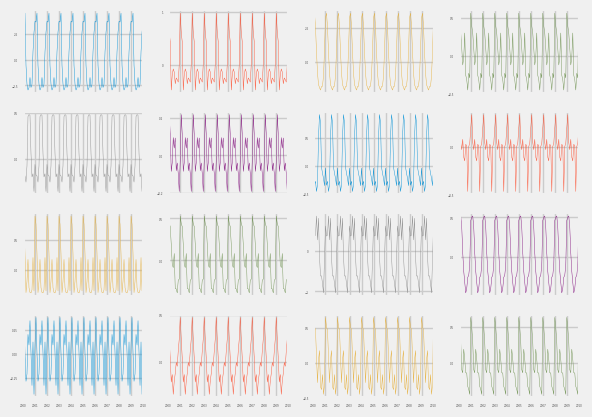

In [181]:
# Get the names of each time series in the DataFrame
jobs_names = jobs.columns
print(jobs_names)

jobs_seasonal = {}

# Extract the seasonal values for the decomposition of each time series
for ts in jobs_names:
    jobs_seasonal[ts] = jobs_decomp[ts].seasonal

# Create a DataFrame from the jobs_seasonal dictionary
seasonality_df = pd.DataFrame.from_dict(jobs_seasonal)

# Remove the label for the index
seasonality_df.index.name = None

# Create a faceted plot of the seasonality_df DataFrame
seasonality_df.plot(subplots=True,
                   layout=(4,4),
                   sharey=False,
                   fontsize=2,
                   linewidth=0.3,
                   legend=False)

# Show plot
plt.show()

## Correlations between multiple time series

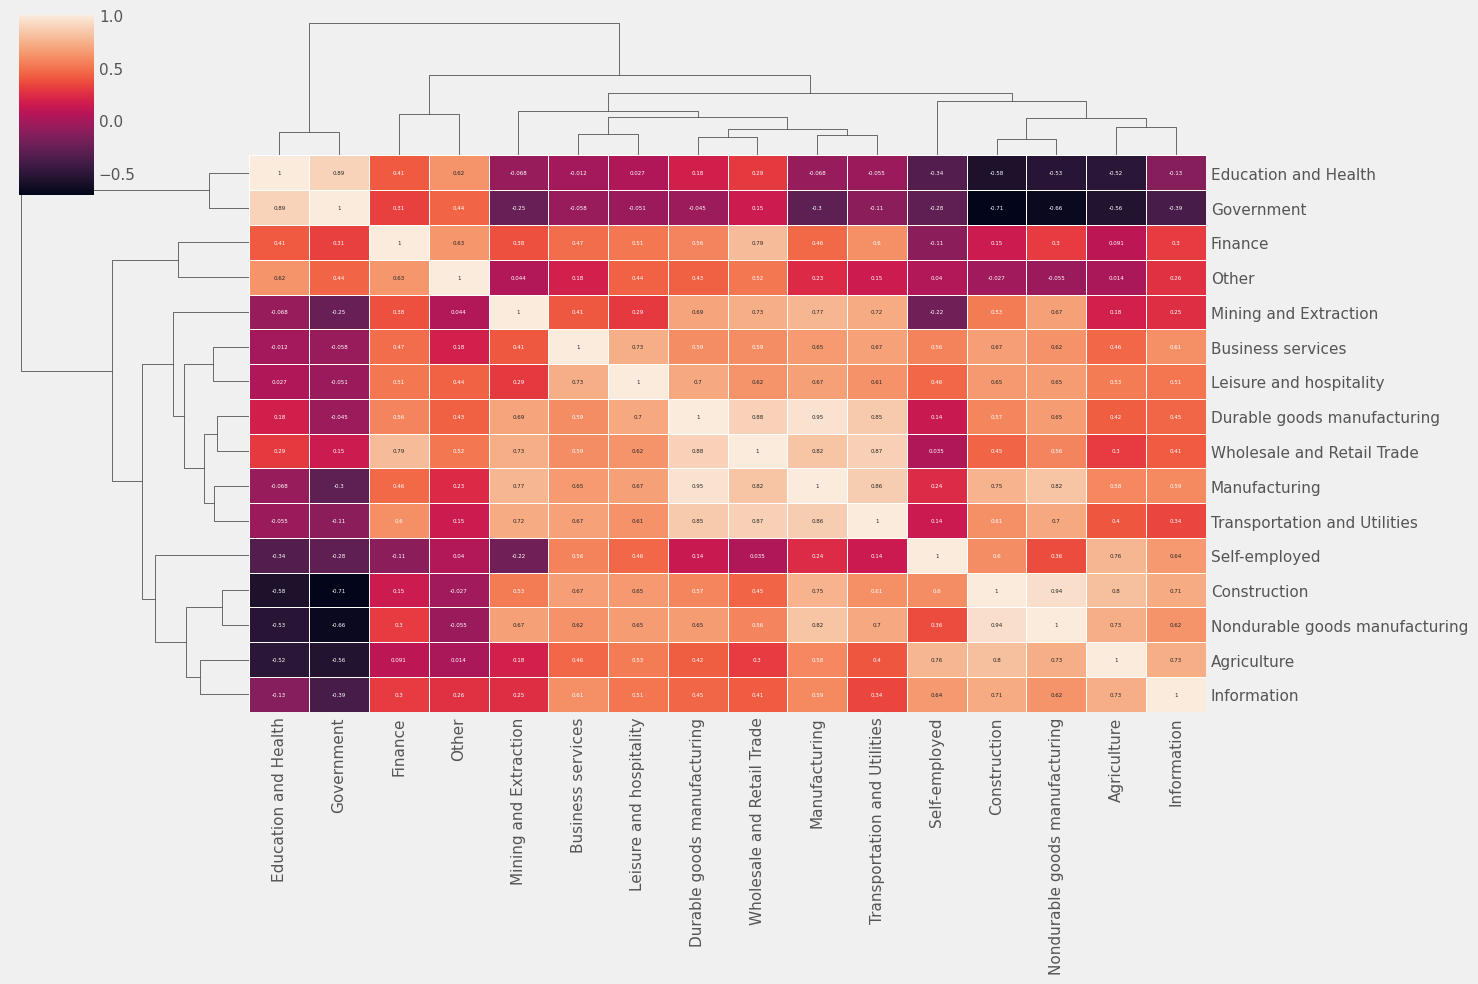

0.89


In [190]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr(method='spearman')

# Customize the clustermap of the seasonality_corr correlation matrix
fig = sns.clustermap(seasonality_corr, annot=True, annot_kws={"size": 4}, linewidths=.4, figsize=(15, 10))
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.show()

# Print the correlation between the seasonalities of the Government and Education & Health industries
print(0.89)